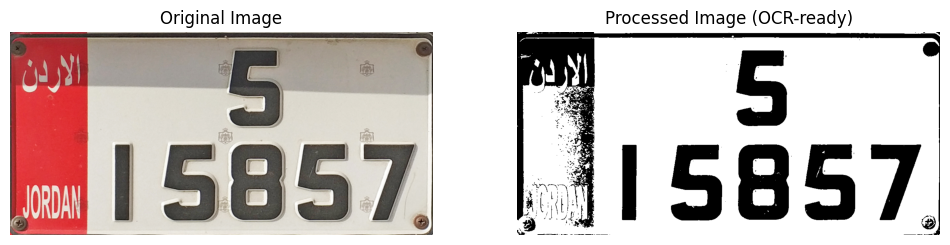

In [2]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Image
import numpy as np

img_path = r"C:\Users\HP\Desktop\del.png"

def preprocess_image(img):
    """Enhanced pipeline for OCR on license plates."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Noise reduction (Median Blur or Gaussian Blur)
    blurred = cv2.GaussianBlur(gray, (1, 1), 0)
    
    # Contrast enhancement (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(blurred)
    
    # Adaptive Thresholding
    thresh = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    _, thresh = cv2.threshold(
        gray, 
        100,  
        255,              # White value for pixels > threshold
        cv2.THRESH_BINARY # Thresholding type
    )
    # thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 13, 16)
    # Morphological Closing to fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return thresh

# Load the image
img = cv2.imread(img_path)

if img is None:
    print("❌ Failed to load image. Check the path.")
else:
    # Process the image
    processed_img = preprocess_image(img)
    
    # Convert BGR to RGB for matplotlib (since OpenCV uses BGR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display original and processed images side by side
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title("Processed Image (OCR-ready)")
    plt.axis('off')
    
    plt.show()

Original: '5', Extracted digits: '5' (Confidence: 1.00)
Original: '15857', Extracted digits: '15857' (Confidence: 0.99)


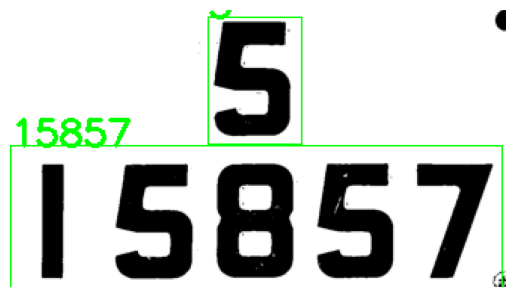

In [2]:
import easyocr
import matplotlib.pyplot as plt
import cv2
import re

# Initialize the reader with allowlist for digits only
reader = easyocr.Reader(['en'], gpu=True)

# Load the image
image_path = r'detected_plates\output.png'  # Replace with your image path
image = cv2.imread(image_path)

# Function to extract digits only from text
def extract_digits(text):
    return ''.join(re.findall(r'\d', text))

if image is None:
    print("Error: Could not load image. Check the path.")
    exit()

# Perform OCR
results = reader.readtext(image_path)

# Process and print results
for (bbox, text, prob) in results:
    digits = extract_digits(text)
    print(f"Original: '{text}', Extracted digits: '{digits}' (Confidence: {prob:.2f})")

    # Draw rectangle and text
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 1)
    cv2.putText(image, digits, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Convert BGR to RGB and show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()